In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
import sklearn

In [2]:
df_featuresonly = pd.read_excel("wc_data_ready_featuresonly.xlsx", engine="openpyxl")
df_featurestarget = pd.read_excel("wc_data_ready_features_target.xlsx", engine="openpyxl")

(target classes)  
0 is cloudy  
1 is rainy  
2 is snowy  
3 is sunny

In [3]:
df_featurestarget

,Temperature (Celsius),Precipitation (%),Wind Speed (km/h),Atmospheric Pressure (hPa),Visibility (km),Humidity (%),Weather Type,Cloud Cover_clear,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Location_coastal,Location_inland,Location_mountain
0,0.363363,0.791792,0.1250,0.153222,-0.333333,0.310904,1,False,False,False,True,False,False,False,True,False,True,False
1,0.930430,0.659660,0.0000,0.180712,1.111111,1.492028,0,False,False,False,True,False,True,False,False,False,True,False
2,0.756757,0.208208,-0.1875,0.509238,0.111111,-0.151275,3,True,False,False,False,False,True,False,False,False,False,True
3,0.920420,0.791792,-0.8750,0.848580,-0.888889,0.824436,3,True,False,False,False,False,True,False,False,True,False,False
4,0.674174,0.610611,1.0625,-0.754845,-0.555556,0.362257,1,False,False,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12313,0.283283,0.659660,0.7500,-0.192429,-0.888889,0.362257,1,False,False,True,False,False,False,True,False,False,False,True
12314,0.174675,0.290290,-0.6250,2.695358,0.222222,0.464964,2,False,True,False,False,False,False,False,True,True,False,False
12315,0.756757,0.321321,-0.3750,0.237494,0.888889,0.516317,0,False,False,True,False,True,False,False,False,True,False,False
12316,0.240741,0.936436,0.1875,-1.043263,-0.666667,0.464964,2,False,False,True,False,False,False,False,True,False,True,False


In [4]:
from sklearn.model_selection import train_test_split
X = df_featuresonly
y = df_featurestarget["Weather Type"]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.8, random_state=40)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=40)


In [5]:
# Multi_class parameter is deprecated. I think the function automatically selects multinomial LogReg when 
# number of target classes >= 3 (documentation) 

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=40)
model.fit(X_train, y_train)

LogisticRegression(random_state=40)

In [6]:
from sklearn.metrics import classification_report 

y_val_pred = model.predict(X_val)
print(classification_report(y_val, y_val_pred, output_dict=True))

# Note: the documentation says, if you specify dict output, you cannot round the values with the rounding parameter 

{'0': {'precision': 0.7455089820359282, 'recall': 0.8469387755102041, 'f1-score': 0.7929936305732485, 'support': 294.0}, '1': {'precision': 0.8610169491525423, 'recall': 0.7987421383647799, 'f1-score': 0.8287112561174551, 'support': 318.0}, '2': {'precision': 0.848297213622291, 'recall': 0.9163879598662207, 'f1-score': 0.8810289389067524, 'support': 299.0}, '3': {'precision': 0.9321428571428572, 'recall': 0.8130841121495327, 'f1-score': 0.8685524126455907, 'support': 321.0}, 'accuracy': 0.8425324675324676, 'macro avg': {'precision': 0.8467415004884047, 'recall': 0.8437882464726844, 'f1-score': 0.8428215595607617, 'support': 1232.0}, 'weighted avg': {'precision': 0.8488975280560013, 'recall': 0.8425324675324676, 'f1-score': 0.8432656526187008, 'support': 1232.0}}



&#8659;&#8659; Should look into these below functions next time &#8659;&#8659;

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
print(confusion_matrix(y_val, y_val_pred))

[[249  26  12   7]
 [ 28 254  29   7]
 [ 13   7 274   5]
 [ 44   8   8 261]]


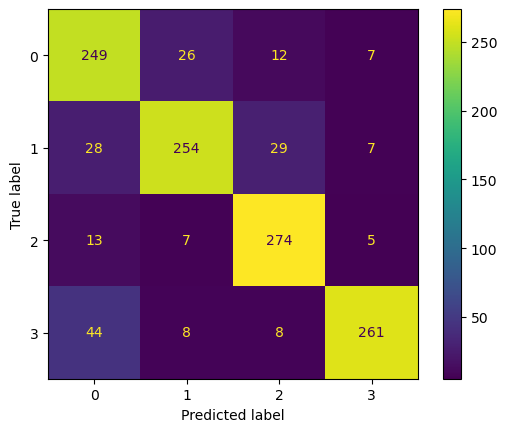

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred)

Add all the squares together and you get almost exactly 10% of original dataset 👍 

In [17]:
model.n_iter_

array([87])

In [20]:
model.coef_

array([[ 1.11326605, -2.36681926, -0.08209665,  0.02835312,  0.39810596,
         0.20582697, -1.16089401, -0.1588918 ,  0.83803131,  0.96435706,
         0.27428498,  0.30036575,  0.17992626, -0.27197443,  0.33924185,
         0.08799413,  0.05536658],
       [ 1.55065703,  3.25346891,  0.41083661,  0.00919332, -0.71149745,
         0.45503647, -2.91468249,  0.95934003,  0.97988409,  0.17027094,
         0.01071201, -0.02193979,  0.0806901 , -0.87464975,  0.08766092,
        -0.40228861, -0.49055974],
       [-5.67520202,  2.56007429,  0.15519137, -0.05364336, -0.03685817,
         0.28019506, -0.98868744,  0.63437734,  0.6133779 , -0.22620897,
        -0.45889076, -0.49985827, -0.55980062,  1.55140846, -0.68299383,
         0.3083437 ,  0.40750894],
       [ 3.01127894, -3.44672394, -0.48393133,  0.01609692,  0.35024965,
        -0.94105849,  5.06426394, -1.43482556, -2.4312933 , -0.90841903,
         0.17389377,  0.22143231,  0.29918426, -0.40478429,  0.25609106,
         0.00595077

V v informative: correlation coefficient between each feature and target. 

But realised: dataset in its current state effectively pointless, because you don't need a model to tell you that clear skies means sunny, and not clear skies means not sunny! Also, except for smog, if it's sunny, surely visibility will always be high -- if it's foggy it's not sunny, is it. And therefore there should be strong correlation between sun and visibility. But there isn't!  
So either need to remove features to make the prediction of weather type more meaningful, or start afresh with another dataset.  
How about both!!  
Removing features: how about remove cloud cover and visibility (and keep UV index out too). Then it would be more meaningful: like predicting weather without seeing or hearing it.  
Could make new GH branch for this

In [21]:
model.intercept_

array([ 0.8488313 , -1.52476478,  0.07582505,  0.60010843])